In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure

h = 6.62607004e-34 #J*s, planck constant
c = 2.99792e8 #m/s', speed of light

from math import log10, floor #functiopn to round stuff to 1 significant figure
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

In [2]:
def convert_eV_to_nm(energy_eV_list):
    # a simple function that takes a list with photon energy values (in eV) and converts them into wavelength (in nm)
    eV = 1.602e-19 #Joule, electronvolt
    h = 6.62607004e-34 #J*s, planck constant
    c = 2.99792e8 #m/s', speed of light
    wavelength_list = []
    for datapoint in energy_eV_list:
        energy_J = datapoint * eV
        wavelength_list.append(h*c/energy_J*1e9) #in nm
    return(wavelength_list)

In [3]:
def convert_nm_to_eV(nm_list):
    eV = 1.602e-19 #Joule, electronvolt
    h = 6.62607004e-34 #J*s, planck constant
    c = 2.99792e8 #m/s', speed of light
    eV_list = []
    for lambda_val in nm_list:
        energy_J = h*c/(lambda_val*1e-9)
        energy_eV = energy_J/eV
        eV_list.append(energy_eV) #in nm
    return(np.array(eV_list))

In [4]:
def read_text_file(filename):
    photon_E, total_yield, yield_error = [],[],[]
    
    copy_lines=[]
    with open(filename) as f:
        lines = f.readlines()

    for line in lines:
        split_line = line.split()
        copy_lines.append(split_line)

    #from each line, extract a name/number and append it into its relevant column
    for i in range(1,len(copy_lines)-1): #2nd line in the file is the first relevant one
        line = copy_lines[i]

        photon_E.append(float(line[0])) #strip element name and type of commas
        total_yield.append(float(line[1]))
        yield_error.append(float(line[2]))

    return([np.array(photon_E), np.array(total_yield), np.array(yield_error)])

# TIMED SEE XPS data (0.05-39.95nm), level 4

In [5]:
df_see_xps = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/timed_see_xps_ssi_l4.csv")
irr_list = []

l=400
for i in range(int(len(df_see_xps)/400)):
    df_day = df_see_xps.iloc[i*l:(i+1)*l]
    wavelength_xps = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_xps = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_xps_stdev = np.nanstd(irr_array,axis=0)

In [6]:
df_see_xps.head()

,time (seconds since 1970-01-01),wavelength (nm),irradiance (W/m^2/nm)
0,1.083760e+09,0.05,2.248946e-10
1,1.083760e+09,0.15,1.063954e-08
2,1.083760e+09,0.25,8.783730e-08
3,1.083760e+09,0.35,3.150440e-07
4,1.083760e+09,0.45,1.015092e-06


# TIMED SEE lever 3 data (40.5-189.5nm)

In [7]:
df_irr_mid = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/timed_see_ssi_l3.csv") #reading Solar data csv file into a dataframe
df_irr_mid.loc[df_irr_mid['irradiance (W/m^2/nm)'] <0, 'irradiance (W/m^2/nm)'] = np.nan
df_irr_mid = df_irr_mid[df_irr_mid['wavelength (nm)'] >= 40]
irr_list = []
all_days = list(set(df_irr_mid['time (yyyyDDD)'].tolist())) #store all day identifiers and remove duplicates

for day_number in all_days:
    df_day = df_irr_mid[df_irr_mid['time (yyyyDDD)'] == day_number]
    wavelength_mid = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_mid = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_mid_stdev = np.nanstd(irr_array,axis=0)

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [8]:
df_irr_mid.head()

,time (yyyyDDD),wavelength (nm),irradiance (W/m^2/nm),uncertainty (W/m^2/nm)
40,2004127,40.5,0.000008,0.098266
41,2004127,41.5,0.000007,0.097826
42,2004127,42.5,0.000005,0.103299
43,2004127,43.5,0.000011,0.093093
44,2004127,44.5,0.000007,0.098221


# SORCE level 3 data (189.5-400nm)

In [9]:
df_irr_near = pd.read_csv("/Users/sebastiankalos/Documents/Moondust_new/irradiance_data/sorce_ssi_l3.csv") #reading Solar data csv file into a dataframe
df_irr_near.loc[df_irr_near['irradiance (W/m^2/nm)'] <0, 'irradiance (W/m^2/nm)'] = np.nan
df_irr_near = df_irr_near[df_irr_near['wavelength (nm)'] > 190]
irr_list = []
all_days = list(set(df_irr_near['time (Julian Date)'].tolist())) #store all day identifiers and remove duplicates
all_days = [ int(x) for x in all_days] #convert all items to integers

for day_number in all_days:
    df_day = df_irr_near[df_irr_near['time (Julian Date)'] == day_number]
    wavelength_near = df_day['wavelength (nm)'].tolist()
    irr = df_day['irradiance (W/m^2/nm)'].tolist()
    irr_list.append(irr)
irr_array = np.array(irr_list)
irradiance_near = np.nanmedian(irr_array,axis=0) #average of almost 20 years!
irr_near_stdev = np.nanstd(irr_array,axis=0)

In [10]:
df_irr_near.head()

,time (Julian Date),wavelength (nm),irradiance (W/m^2/nm),uncertainty (W/m^2/nm),quality (Bit Flag)
75,2453131.0,190.5,0.003981,0.000084,0
76,2453131.0,191.5,0.004226,0.000090,0
77,2453131.0,192.5,0.004565,0.000097,0
78,2453131.0,193.5,0.003525,0.000076,0
79,2453131.0,194.5,0.005795,0.000131,0


In [11]:
irradiance = np.concatenate((irradiance_xps, irradiance_mid,irradiance_near))
wavelength = np.concatenate((wavelength_xps, wavelength_mid,wavelength_near))
irr_stdev = np.concatenate((irr_xps_stdev,irr_mid_stdev,irr_near_stdev))

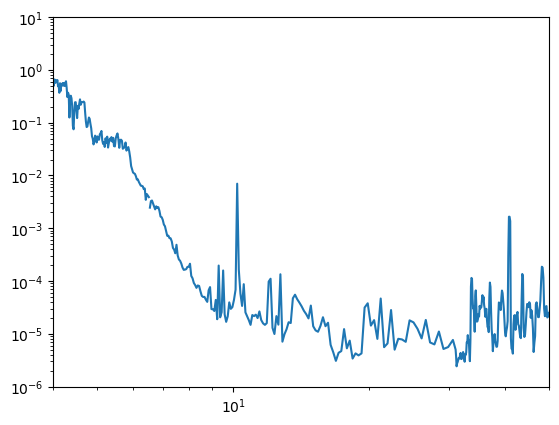

In [12]:
plt.plot(convert_nm_to_eV(wavelength),irradiance)
plt.xlim(4,50)
plt.ylim(1e-6,10)

plt.xscale('log')
plt.yscale('log')

# Load yield data

In [13]:
[Au_full_E, Au_full_TEY, Au_full_TEY_err] = read_text_file('TEY_files/Au_full_yield.txt')
[Mg_alloy_full_E, Mg_alloy_full_TEY, Mg_alloy_full_TEY_err] = read_text_file('TEY_files/Mg_alloy_full_yield.txt')
[Aerodag_full_E, Aerodag_full_TEY, Aerodag_full_TEY_err] = read_text_file('TEY_files/Aerodag_full_yield.txt')
[Graphite_full_E, Graphite_full_TEY, Graphite_full_TEY_err] = read_text_file('TEY_files/Graphite_full_yield.txt')
[Coverglass_full_E, Coverglass_full_TEY, Coverglass_full_TEY_err] = read_text_file('TEY_files/Coverglass_full_yield.txt')
[Ag_full_E, Ag_full_TEY, Ag_full_TEY_err] = read_text_file('TEY_files/Ag_full_yield.txt')
[Ti_full_E, Ti_full_TEY, Ti_full_TEY_err] = read_text_file('TEY_files/Ti_full_yield.txt')

[ITO_MLI_aug22_full_E, ITO_MLI_aug22_full_TEY, ITO_MLI_aug22_full_TEY_err] = read_text_file('TEY_files/ITO_MLI_aug22_full_yield.txt')

[ITO_radiator_full_E, ITO_radiator_full_TEY, ITO_radiator_full_TEY_err] = read_text_file('TEY_files/ITO_radiator_full_yield.txt')
[ITO_aug22_full_E, ITO_aug22_full_TEY, ITO_aug22_full_TEY_err] = read_text_file('TEY_files/ITO_aug22_full_yield.txt')
[ITO2_aug22_full_E, ITO2_aug22_full_TEY, ITO2_aug22_full_TEY_err] = read_text_file('TEY_files/ITO2_aug22_full_yield.txt')

In [14]:
marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

In [15]:
def split_by_nm(eV_list=list,TEY_list=list,thresholds_nm=list):
    nm_list = convert_eV_to_nm(eV_list)
    start_nm = thresholds_nm[0]
    stop_nm = thresholds_nm[1]
    def condition(x, start, stop): return (x >= start and x<stop)
    output = [idx for idx, element in enumerate(nm_list) if condition(element,start_nm,stop_nm)]
    picked_nm = [nm_list[ind] for ind in output]
    picked_TEY = [TEY_list[ind] for ind in output]
    return [picked_nm,picked_TEY]

def split_to_fit(eV_list=list,TEY_list=list,nm_limits=list,orders=list):
    fits = []
    for i in range(len(nm_limits)-1):
        start = nm_limits[i]
        stop = nm_limits[i+1]
        [nm,tey] = split_by_nm(eV_list=eV_list,TEY_list=TEY_list,thresholds_nm=[start,stop])
        fit = np.poly1d(np.polyfit(nm, tey, orders[i]))
        fits.append(fit)
    return fits

In [16]:
def el_flux(wavelength,irradiance,irradiance_stdev,lims,TEY_fits,TEY_err_fits):
    h = 6.62607004e-34 #J*s, planck constant
    c = 2.99792e8 #m/s', speed of light
    spectral_flux = []
    spectral_flux_err = []
    used_lambda = []
    for i in range(len(wavelength)-1):
        lambda_val = wavelength[i]
        irr_val = irradiance[i]
        flag = 0
        for l in range(len(lims)-1):
            if lambda_val >= lims[l] and lambda_val < lims[l+1]:
                current_reg = l
                flag  = 1

        if flag:
            fit = TEY_fits[current_reg] #fit takes in wavelength in nm, not m!
            err_fit = TEY_err_fits[current_reg]

            dY = err_fit(lambda_val)
            dF = irradiance_stdev[i]
            d_lambda = 0.1 #nm
            spectral_flux_val = fit(lambda_val)*irr_val*(lambda_val*1e-9)/(h*c) # * d_lambda only in the full integral, not spectrum!
            spectral_flux.append(spectral_flux_val)
            spectral_flux_val_err = 1/(h*c)*np.sqrt((irr_val*lambda_val*1e-9*dY)**2 + (fit(lambda_val)*lambda_val*1e-9*dF)**2 + (fit(lambda_val)*irr_val*d_lambda*1e-9)**2)
            spectral_flux_err.append(spectral_flux_val_err)
            used_lambda.append(lambda_val)

    return np.array(used_lambda),np.array(spectral_flux),np.array(spectral_flux_err)

        Current density [A/m^2]: 3.84655689079466e-05
rounded Current density [A/m^2]: 3.85e-05
        error [A/m^2]:           1.6204155231008873e-05
relative error:                  0.42


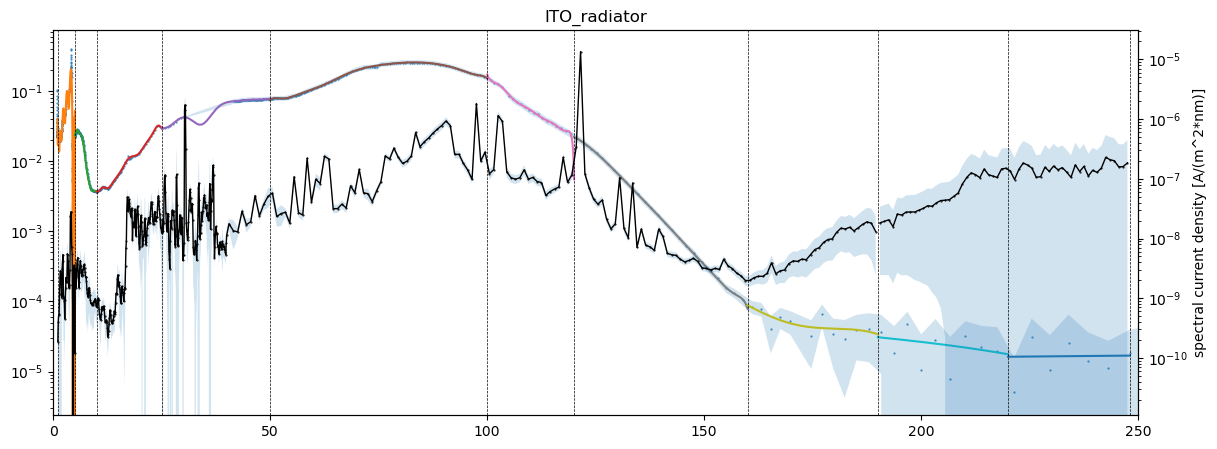

In [17]:
import warnings
warnings.filterwarnings('ignore')

name = 'ITO_radiator'
eV_list = ITO_radiator_full_E
TEY_list = ITO_radiator_full_TEY
TEY_err_list = ITO_radiator_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 248]
orders = [ 15, 15,  15,  15,   15,  15,   10, 3, 1, 1  ]

fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]
        else:
            int_flux_err += flux_err[i]

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 4.296187114416145e-05
rounded Current density [A/m^2]: 4.3e-05
        error [A/m^2]:           8.182261960721751e-06
relative error:                  0.19


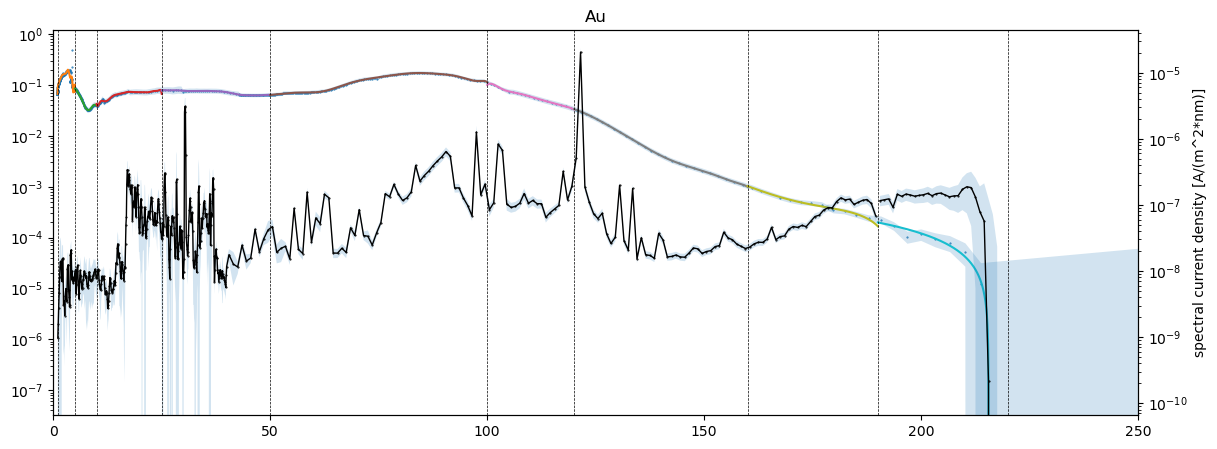

In [18]:
import warnings
warnings.filterwarnings('ignore')

name = 'Au'
eV_list = Au_full_E
TEY_list = Au_full_TEY
TEY_err_list = Au_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220]
orders = [ 15, 15,  15,  15,   15,  15,   10, 3, 1, ]

fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 0.0001712063154559221
rounded Current density [A/m^2]: 0.000171
        error [A/m^2]:           6.280060418461995e-05
relative error:                  0.37


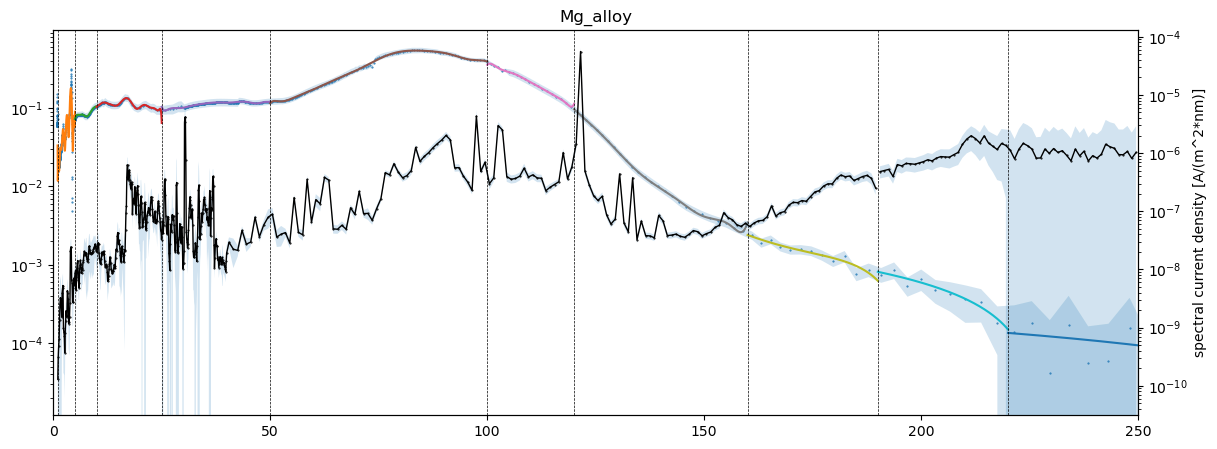

In [19]:
import warnings
warnings.filterwarnings('ignore')

name = 'Mg_alloy'
eV_list = Mg_alloy_full_E
TEY_list = Mg_alloy_full_TEY
TEY_err_list = Mg_alloy_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   10, 3, 1, 1  ]

fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 4.167978018337524e-05
rounded Current density [A/m^2]: 4.17e-05
        error [A/m^2]:           1.4681870787881064e-05
relative error:                  0.35


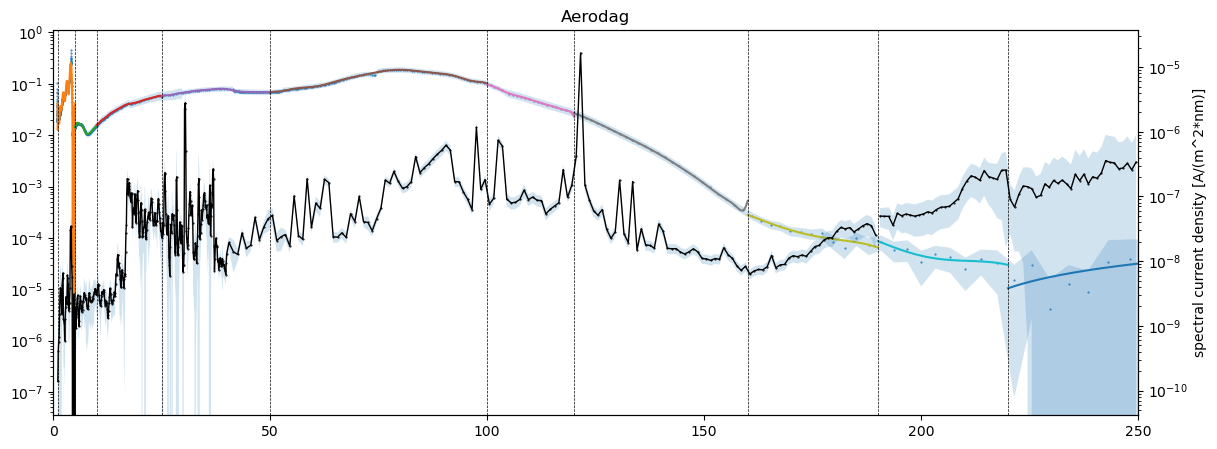

In [20]:
import warnings
warnings.filterwarnings('ignore')

name = 'Aerodag'
eV_list = Aerodag_full_E
TEY_list = Aerodag_full_TEY
TEY_err_list = Aerodag_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 6.0528231977703025e-05
rounded Current density [A/m^2]: 6.05e-05
        error [A/m^2]:           2.8818433316629957e-05
relative error:                  0.48


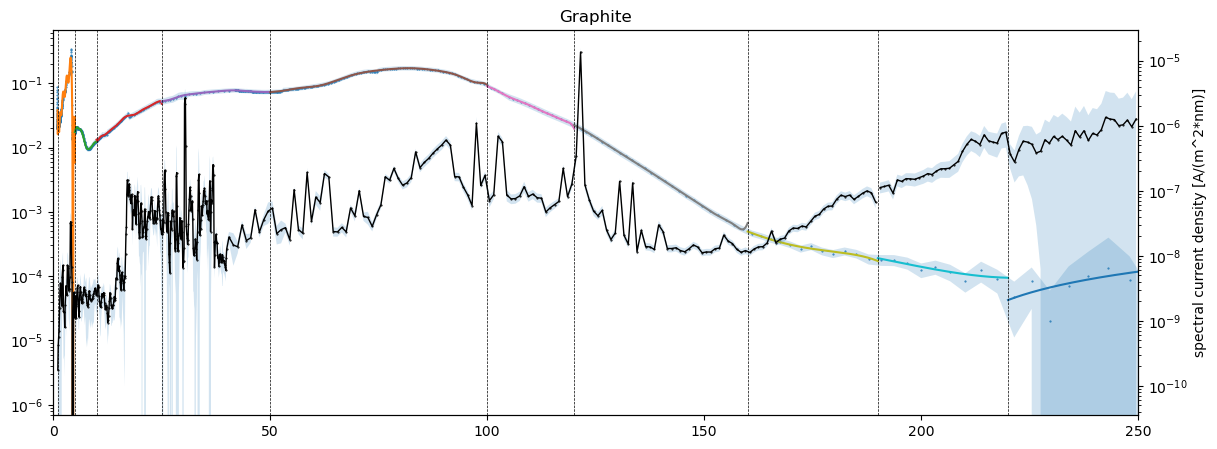

In [21]:
import warnings
warnings.filterwarnings('ignore')

name = 'Graphite'
eV_list = Graphite_full_E
TEY_list = Graphite_full_TEY
TEY_err_list = Graphite_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 2, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 5.083048928187561e-05
rounded Current density [A/m^2]: 5.08e-05
        error [A/m^2]:           2.727104549919547e-05
relative error:                  0.54


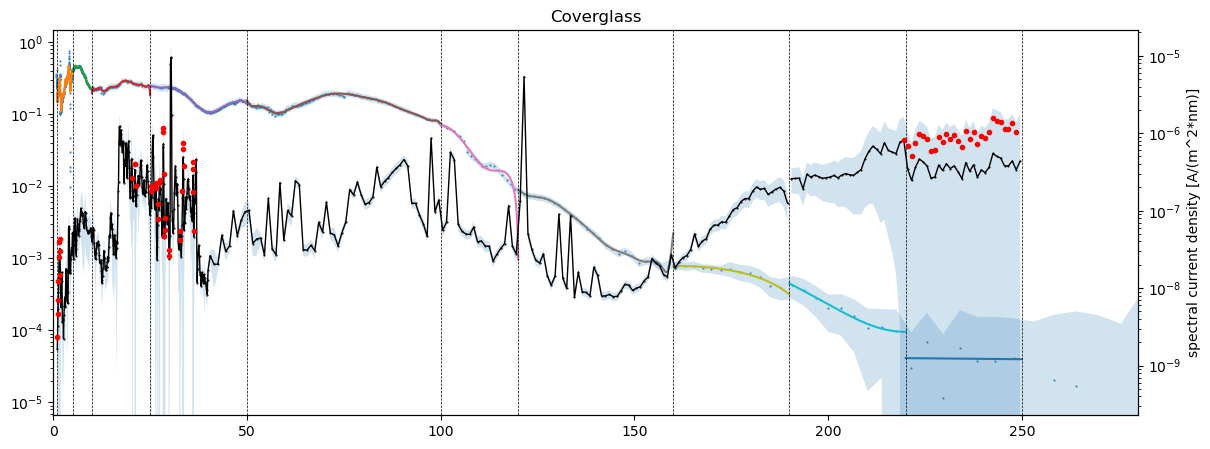

In [22]:
import warnings
warnings.filterwarnings('ignore')

name = 'Coverglass'
eV_list = Coverglass_full_E
TEY_list = Coverglass_full_TEY
TEY_err_list = Coverglass_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  4,   15, 2, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,280)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

test_nm = []
test_err = []

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
            test_nm.append(nm[i])
            test_err.append(flux_err[i])
        else:
            int_flux_err += flux_err[i]*d_nm

ax2.plot(np.array(test_nm),np.array(test_err)*e,'.',color='red')

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

        Current density [A/m^2]: 7.424042376106744e-05
rounded Current density [A/m^2]: 7.42e-05
        error [A/m^2]:           2.789647637801821e-05
relative error:                  0.38


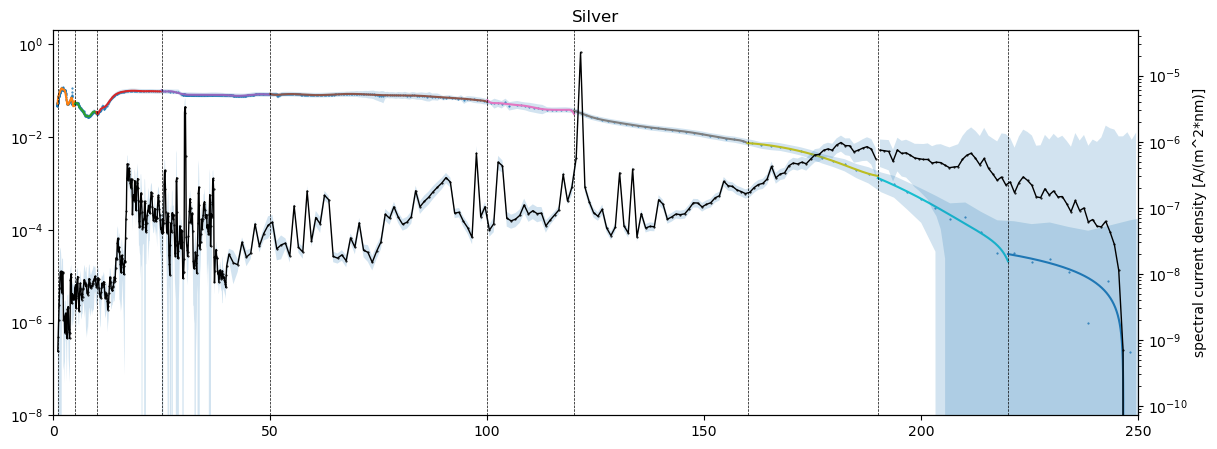

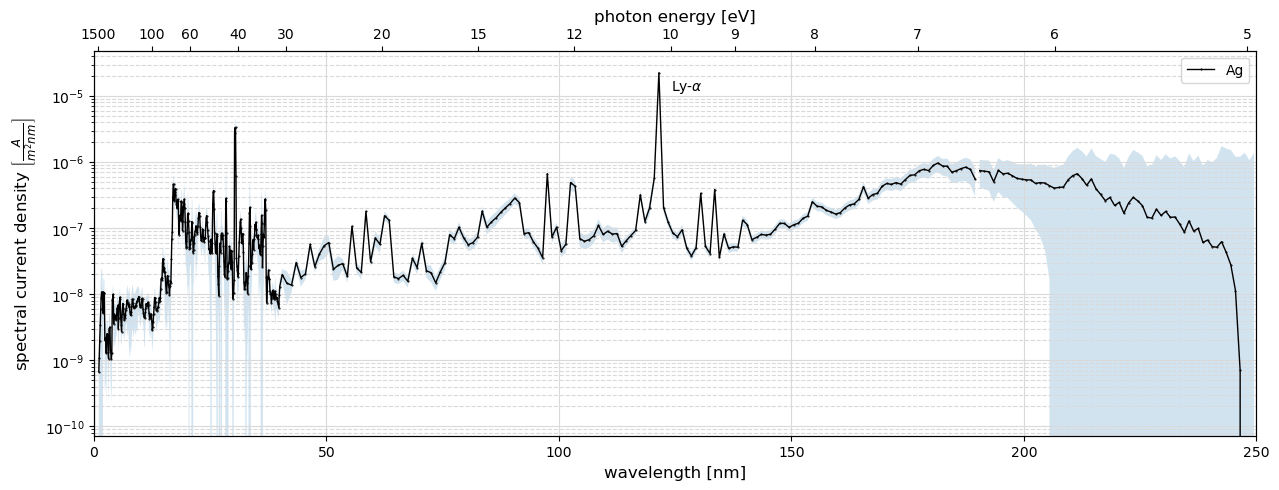

In [23]:
import warnings
warnings.filterwarnings('ignore')

name = 'Silver'
eV_list = Ag_full_E
TEY_list = Ag_full_TEY
TEY_err_list = Ag_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)
ax1.set_ylim(1e-8,2)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

fig, ax1 = plt.subplots(figsize=(15, 5),dpi=100)
ax1.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1,label='Ag')
ax1.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')
ax1.set_xlabel('wavelength [nm]',size=12)
ax1.set_ylabel(r'spectral current density $\left[\frac{A}{m^2 nm}\right]$',size=12)
ax1.text(124, 1.2e-5, r'Ly-$\alpha$')
ax1.legend()

ax3 = ax1.twiny()
new_eV_ticks=[5,6,7,8,9,10,12,15,20,30,40,60,100,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(new_eV_ticks)
ax3.set_xlabel('photon energy [eV]',size=12)

plt.savefig('plots/spectral_current_density.png', bbox_inches='tight', dpi=300)

        Current density [A/m^2]: 4.3890576156517266e-05
rounded Current density [A/m^2]: 4.39e-05
        error [A/m^2]:           1.2616255238849044e-05
relative error:                  0.29


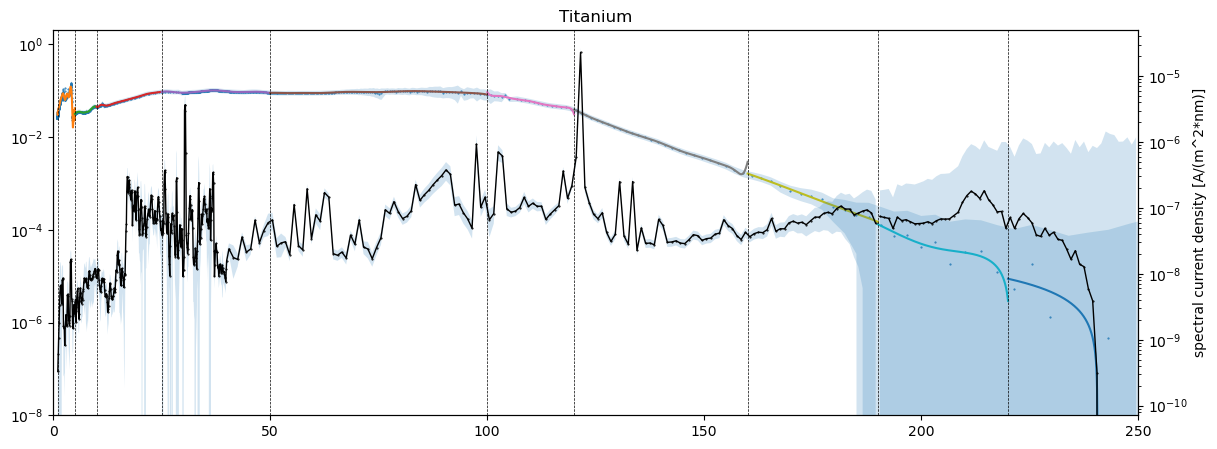

In [24]:
import warnings
warnings.filterwarnings('ignore')

name = 'Titanium'
eV_list = Ti_full_E
TEY_list = Ti_full_TEY
TEY_err_list = Ti_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)
ax1.set_ylim(1e-8,2)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

# METALS (Ag, Au, Ti, Mg alloy)

AttributeError: 'Line2D' object has no attribute '_legmarker'

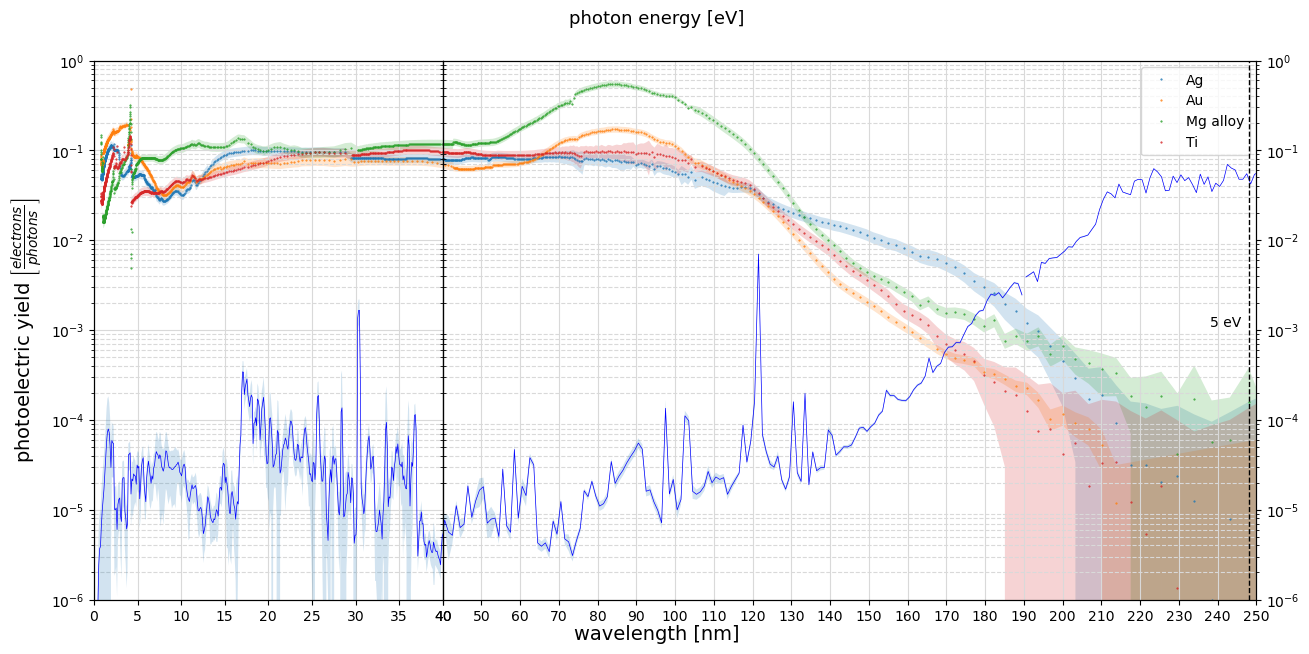

In [25]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (15,7),dpi=100)
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Ag_full_E)), np.array(Ag_full_TEY)+np.array(Ag_full_TEY_err), np.array(Ag_full_TEY)-np.array(Ag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY,'.',markersize=1,label='Ag')
ax2.fill_between(np.array(convert_eV_to_nm(Ag_full_E)), np.array(Ag_full_TEY)+np.array(Ag_full_TEY_err), np.array(Ag_full_TEY)-np.array(Ag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Au_full_E),Au_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Au_full_E)), np.array(Au_full_TEY)+np.array(Au_full_TEY_err), np.array(Au_full_TEY)-np.array(Au_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Au_full_E),Au_full_TEY,'.',markersize=1,label='Au')
ax2.fill_between(np.array(convert_eV_to_nm(Au_full_E)), np.array(Au_full_TEY)+np.array(Au_full_TEY_err), np.array(Au_full_TEY)-np.array(Au_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Mg_alloy_full_E),Mg_alloy_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Mg_alloy_full_E)), np.array(Mg_alloy_full_TEY)+np.array(Mg_alloy_full_TEY_err), np.array(Mg_alloy_full_TEY)-np.array(Mg_alloy_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Mg_alloy_full_E),Mg_alloy_full_TEY,'.',markersize=1,label='Mg alloy')
ax2.fill_between(np.array(convert_eV_to_nm(Mg_alloy_full_E)), np.array(Mg_alloy_full_TEY)+np.array(Mg_alloy_full_TEY_err), np.array(Mg_alloy_full_TEY)-np.array(Mg_alloy_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Ti_full_E),Ti_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Ti_full_E)), np.array(Ti_full_TEY)+np.array(Ti_full_TEY_err), np.array(Ti_full_TEY)-np.array(Ti_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Ti_full_E),Ti_full_TEY,'.',markersize=1,label='Ti')
ax2.fill_between(np.array(convert_eV_to_nm(Ti_full_E)), np.array(Ti_full_TEY)+np.array(Ti_full_TEY_err), np.array(Ti_full_TEY)-np.array(Ti_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

plt.axvline(x=convert_eV_to_nm([5])[0],linestyle='--',color='black',linewidth=1)
plt.text(x=238.0,y=1.1e-3,s='5 eV')

x_stop = 250
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

x_stop = 250
ax1.set_xlim(0,40)

#ax1.set_xlim(1,40)
#ax1.set_xscale('log')

ax2.set_xlim(40,x_stop)

#plt.figtext(0.5, 0.9, 'Photoelectric Yield of Investigated Metals with Solar Spectral Irradiance Superimposed', ha='center', va='center',fontsize='medium')
plt.figtext(0.5, 0.06, 'wavelength [nm]', ha='center', va='center',size=14)
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

leg = ax2.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

ax6 = ax2.twiny()
new_eV_ticks=[5,6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax4.set_ylabel(r"Solar Spectral Irradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/metals_yield_stretched.png', bbox_inches='tight', dpi=300)

# GRAPHITE SAMPLES + Coverglass + ITO (MLI)

AttributeError: 'Line2D' object has no attribute '_legmarker'

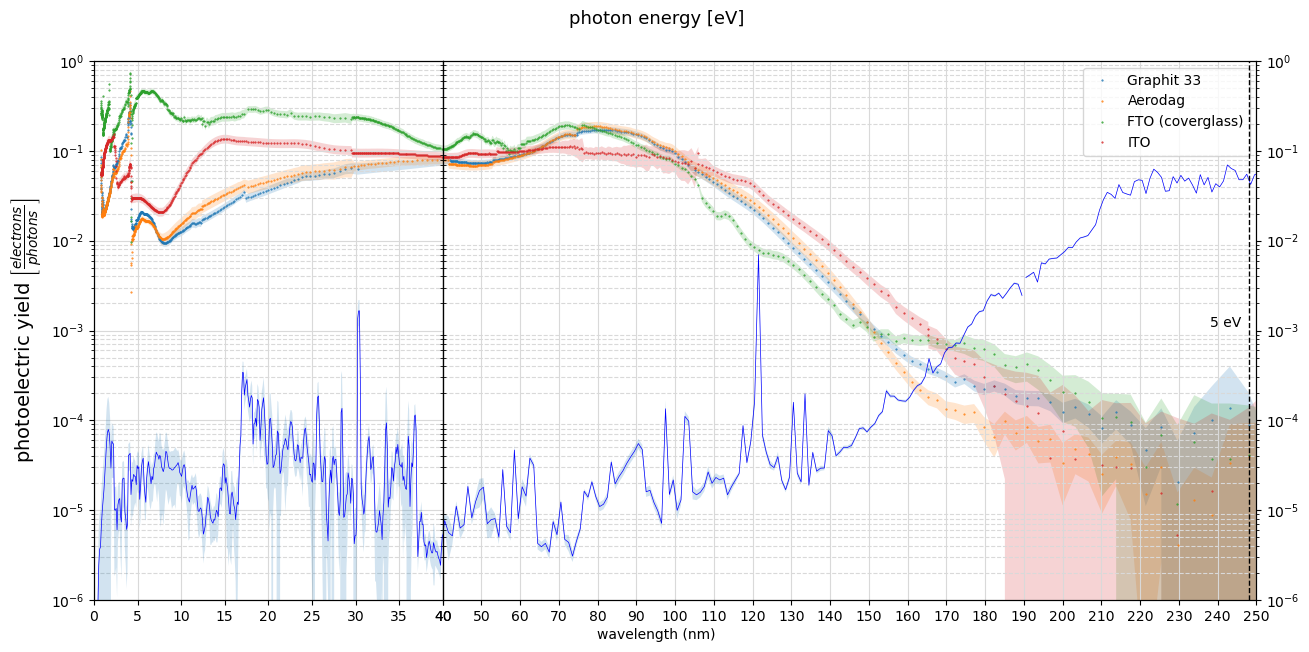

In [ ]:
plt.figure(figsize = (15,7),dpi=100)
import matplotlib.gridspec as gridspe
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Graphite_full_E),Graphite_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Graphite_full_E)), np.array(Graphite_full_TEY)+np.array(Graphite_full_TEY_err), np.array(Graphite_full_TEY)-np.array(Graphite_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Graphite_full_E),Graphite_full_TEY,'.',markersize=1,label='Graphit 33')
ax2.fill_between(np.array(convert_eV_to_nm(Graphite_full_E)), np.array(Graphite_full_TEY)+np.array(Graphite_full_TEY_err), np.array(Graphite_full_TEY)-np.array(Graphite_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Aerodag_full_E),Aerodag_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Aerodag_full_E)), np.array(Aerodag_full_TEY)+np.array(Aerodag_full_TEY_err), np.array(Aerodag_full_TEY)-np.array(Aerodag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Aerodag_full_E),Aerodag_full_TEY,'.',markersize=1,label='Aerodag')
ax2.fill_between(np.array(convert_eV_to_nm(Aerodag_full_E)), np.array(Aerodag_full_TEY)+np.array(Aerodag_full_TEY_err), np.array(Aerodag_full_TEY)-np.array(Aerodag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Coverglass_full_E),Coverglass_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Coverglass_full_E)), np.array(Coverglass_full_TEY)+np.array(Coverglass_full_TEY_err), np.array(Coverglass_full_TEY)-np.array(Coverglass_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Coverglass_full_E),Coverglass_full_TEY,'.',markersize=1,label='FTO (coverglass)')
ax2.fill_between(np.array(convert_eV_to_nm(Coverglass_full_E)), np.array(Coverglass_full_TEY)+np.array(Coverglass_full_TEY_err), np.array(Coverglass_full_TEY)-np.array(Coverglass_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(ITO_MLI_aug22_full_E),ITO_MLI_aug22_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(ITO_MLI_aug22_full_E)), np.array(ITO_MLI_aug22_full_TEY)+np.array(ITO_MLI_aug22_full_TEY_err), np.array(ITO_MLI_aug22_full_TEY)-np.array(ITO_MLI_aug22_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(ITO_MLI_aug22_full_E),ITO_MLI_aug22_full_TEY,'.',markersize=1,label='ITO')
ax2.fill_between(np.array(convert_eV_to_nm(ITO_MLI_aug22_full_E)), np.array(ITO_MLI_aug22_full_TEY)+np.array(ITO_MLI_aug22_full_TEY_err), np.array(ITO_MLI_aug22_full_TEY)-np.array(ITO_MLI_aug22_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

plt.axvline(x=convert_eV_to_nm([5])[0],linestyle='--',color='black',linewidth=1)
plt.text(x=238.0,y=1.1e-3,s='5 eV')

x_stop = 250
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

#plt.figtext(0.5, 0.9, 'Photoelectric Yield of Graphite Coatings and Coverglass with Solar Spectral Irradiance Superimposed', ha='center', va='center',fontsize='medium')
plt.figtext(0.5, 0.06, 'wavelength (nm)', ha='center', va='center')
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

leg = ax2.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

ax6 = ax2.twiny()
new_eV_ticks=[5,6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax4.set_ylabel(r"Solar Spectral Irradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/graphite_coverglass_yield_stretched.png', bbox_inches='tight', dpi=300)

AttributeError: 'Line2D' object has no attribute '_legmarker'

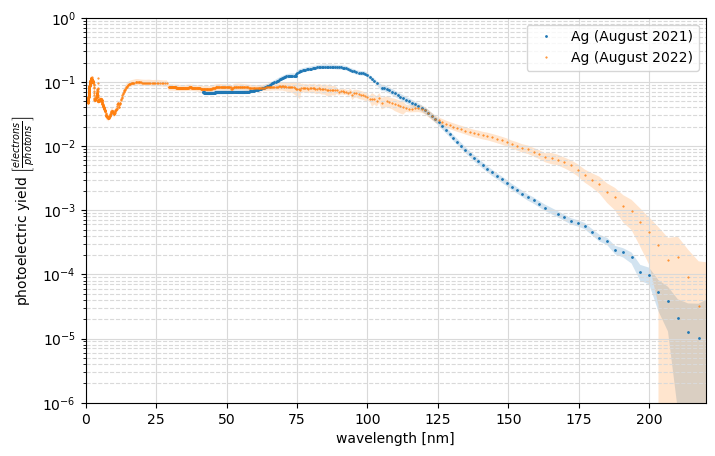

In [ ]:
[Ag_45_E, Ag_45_TEY, Ag_45_TEY_err] = read_text_file('TEY_files/Ag_45deg.txt')
[RAW_Au_E, RAW_Au_TEY, RAW_Au_TEY_err] = read_text_file('TEY_files/RAW_Au_yield.txt')

figure(figsize=(8, 5),dpi=100)
plt.plot(convert_eV_to_nm(Ag_45_E),Ag_45_TEY,'.',markersize=2,label='Ag (August 2021)')
plt.fill_between(convert_eV_to_nm(Ag_45_E), [i-j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], [i+j for i,j in zip(Ag_45_TEY,Ag_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY,'.',markersize=1,label='Ag (August 2022)')
plt.fill_between(np.array(convert_eV_to_nm(Ag_full_E)), np.array(Ag_full_TEY)+np.array(Ag_full_TEY_err), np.array(Ag_full_TEY)-np.array(Ag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

plt.grid(which = 'major', linestyle='-',color='0.85')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.xlim(0,220)
plt.ylim(1e-6,1)
plt.legend()
#plt.title('Yield of Silver: comparison of scans August 2021 and August 2022')
plt.xlabel('wavelength [nm]')
plt.ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$")

leg = plt.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(1)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/yield_Ag_comparison.png', bbox_inches='tight', dpi=300)

-0.09314852260673394
0.0005666601922436702


AttributeError: 'Line2D' object has no attribute '_legmarker'

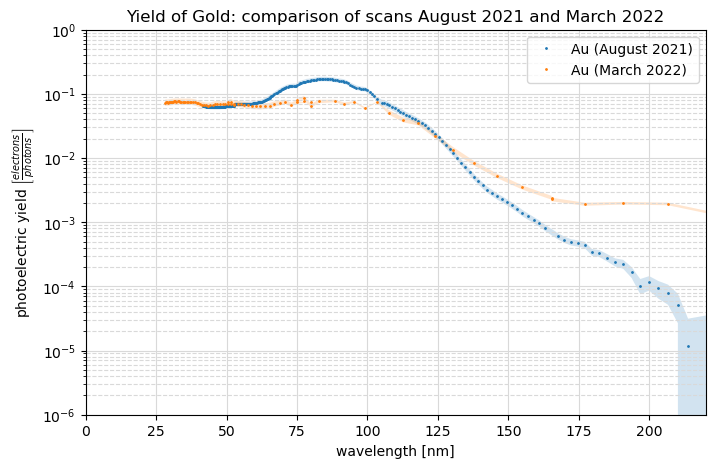

In [ ]:
[Au_45_E, Au_45_TEY, Au_45_TEY_err] = read_text_file('TEY_files/Au_45deg.txt')
[RAW_Au_E, RAW_Au_TEY, RAW_Au_TEY_err] = read_text_file('TEY_files/RAW_Au_yield.txt')

print(min(RAW_Au_TEY))

#delete all non
new_E,new_TEY,new_err=[],[],[]
for i in range(len(RAW_Au_E)):
    if RAW_Au_TEY[i]>1e-4 and RAW_Au_TEY[i]<0.1:
        new_E.append(RAW_Au_E[i])
        new_TEY.append(RAW_Au_TEY[i])
        new_err.append(RAW_Au_TEY_err[i])
RAW_Au_E = new_E
RAW_Au_TEY = new_TEY
RAW_Au_TEY_err = new_err

print(min(RAW_Au_TEY))


figure(figsize=(8, 5),dpi=100)

plt.plot(convert_eV_to_nm(Au_45_E),Au_45_TEY,'.',markersize=2,label='Au (August 2021)')
plt.fill_between(convert_eV_to_nm(Au_45_E), [i-j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], [i+j for i,j in zip(Au_45_TEY,Au_45_TEY_err)], alpha=alpha, joinstyle=joinstyle)

plt.plot(convert_eV_to_nm(RAW_Au_E),RAW_Au_TEY,'.',markersize=2,label='Au (March 2022)')
plt.fill_between(np.array(convert_eV_to_nm(RAW_Au_E)), np.array(RAW_Au_TEY)+np.array(RAW_Au_TEY_err), np.array(RAW_Au_TEY)-np.array(RAW_Au_TEY_err), alpha=alpha, joinstyle=joinstyle)


plt.grid(which = 'major', linestyle='-',color='0.85')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.xlim(0,220)
plt.ylim(1e-6,1)
plt.legend()
plt.title('Yield of Gold: comparison of scans August 2021 and March 2022')
plt.xlabel('wavelength [nm]')
plt.ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$")

leg = plt.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(1)
    lh._legmarker.set_markersize(20)

plt.savefig('plots/yield_Au_comparison.png', dpi=300)

# Normalization of the photodiode madness:

Text(0.5, 1.0, 'yield fits for Gold')

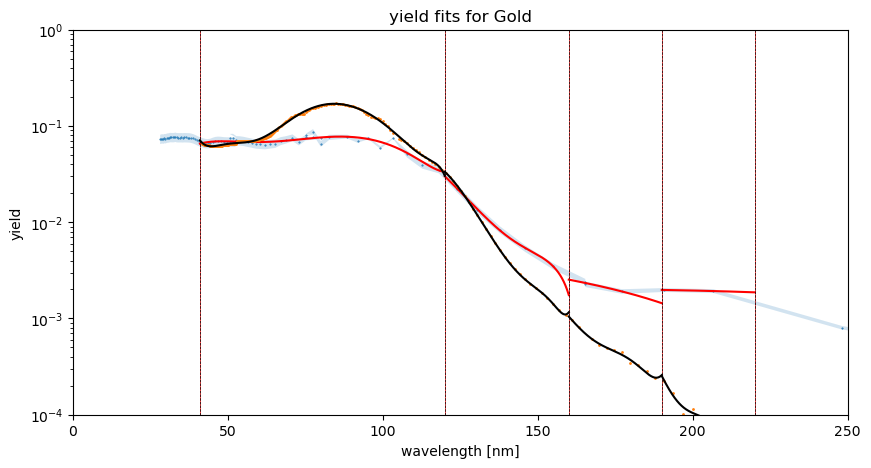

In [ ]:
import warnings
warnings.filterwarnings('ignore')

name = 'Gold_2022'
eV_list = RAW_Au_E
TEY_list = RAW_Au_TEY
TEY_err_list = RAW_Au_TEY_err
lims_Au22 =   [ 41  ,120, 160, 190 ,220]
orders_Au22 = [   5,  3,  1,    3]

figure(figsize=(10, 5),dpi=100)
plt.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
plt.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
plt.yscale('log')
plt.xlim(0,250)
plt.ylim(1e-8,2)

fits_Au22 = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims_Au22,orders=orders_Au22)
err_fits_Au22 = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims_Au22,orders=orders_Au22)

regs_Au22 = []
for i in range(len(lims_Au22)-1):
    reg = np.linspace(lims_Au22[i],lims_Au22[i+1],1000)
    regs_Au22.append(reg)

nm_Au22 = []
tey_Au22 = []
for i in range(len(regs_Au22)):
    nm = regs_Au22[i]
    fit = fits_Au22[i]
    tey = fit(nm)
    plt.plot(nm,tey,color='red')
    nm_Au22.extend(nm)
    tey_Au22.extend(tey)
for val in lims_Au22:
    plt.axvline(x=val,linestyle='-',linewidth=0.5,color='red')

########################################################################################################################
########################################################################################################################

name = 'Gold_2021'
eV_list = Au_45_E
TEY_list = Au_45_TEY
TEY_err_list = Au_45_TEY_err
lims_Au21 =   [ 41 , 120, 160, 190 ,220]
orders_Au21 = [   10,   7,   5,    4]

plt.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=2,label=name)
#plt.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)

fits_Au21 = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims_Au21,orders=orders_Au21)
err_fits_Au21 = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims_Au21,orders=orders_Au21)

regs_Au21 = []
for i in range(len(lims_Au21)-1):
    reg = np.linspace(lims_Au21[i],lims_Au21[i+1],1000)
    regs_Au21.append(reg)

nm_Au21 = []
tey_Au21 = []
for i in range(len(regs_Au21)):
    nm = regs_Au21[i]
    fit = fits_Au21[i]
    tey = fit(nm)
    plt.plot(nm,tey,color='black')
    nm_Au21.extend(nm)
    tey_Au21.extend(tey)
for val in lims_Au21:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

plt.ylim(1e-4,1)
plt.xlabel('wavelength [nm]')
plt.ylabel('yield')
plt.title('yield fits for Gold')

Text(0.5, 1.0, 'normalization factor (Gold)')

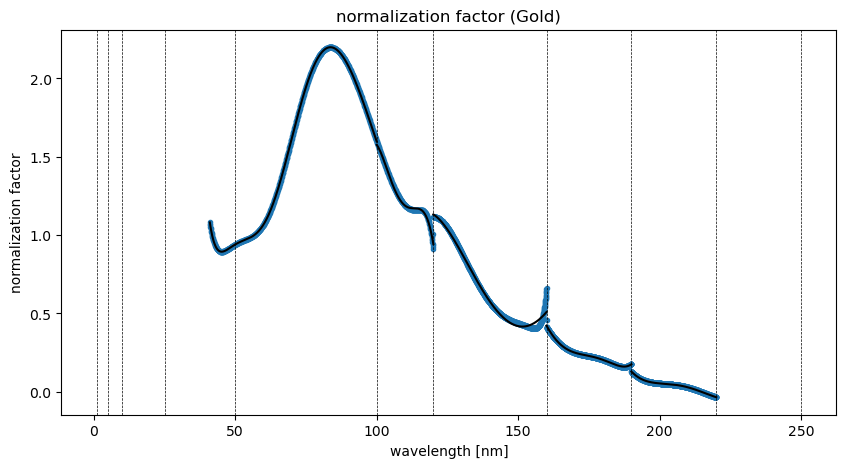

In [ ]:
#now onto actually finding the normalization factor (function):
norm_factor_Au = []
for i in range(len(nm_Au22)):
    if nm_Au22[i] not in nm_Au21:
        norm_factor_Au.append(float(1))
    else:
        ind = nm_Au21.index(nm_Au22[i])
        norm_factor_Au.append(tey_Au21[ind]/tey_Au22[i])

figure(figsize=(10, 5),dpi=100)
plt.plot(nm_Au21,norm_factor_Au,'.')

f_lims_Au =   [ 41 , 100 , 120, 160, 190 ,220]
f_orders_Au = [   15,  4,   4,   5,    4]

f_fits_Au = split_to_fit(eV_list=convert_nm_to_eV(nm_Au21),TEY_list=norm_factor_Au,nm_limits=f_lims_Au,orders=f_orders_Au)
f_regs_Au = []
for i in range(len(f_lims_Au)-1):
    f_reg = np.linspace(f_lims_Au[i],f_lims_Au[i+1],1000)
    f_regs_Au.append(f_reg)
for i in range(len(f_regs_Au)):
    nm = f_regs_Au[i]
    f_fit = f_fits_Au[i]
    factor = f_fit(nm)
    plt.plot(nm,factor,color='black')
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

plt.xlabel('wavelength [nm]')
plt.ylabel('normalization factor')
plt.title('normalization factor (Gold)')

Text(0.5, 1.0, 'yield fits for Silver')

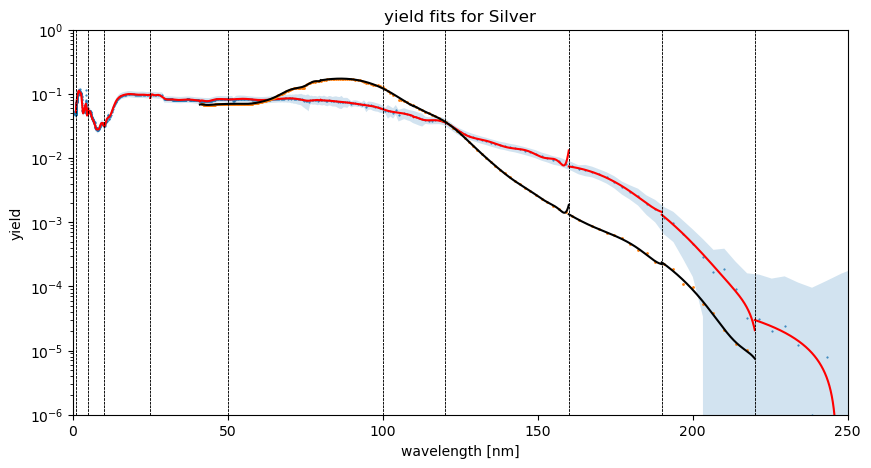

In [ ]:
import warnings
warnings.filterwarnings('ignore')

name = 'Silver_2022'
eV_list = Ag_full_E
TEY_list = Ag_full_TEY
TEY_err_list = Ag_full_TEY_err
lims_Ag22 =   [1 , 5 , 10 , 25 , 41 , 80 , 110, 160, 190 ,220, 250]
orders_Ag22 = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]

figure(figsize=(10, 5),dpi=100)
plt.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
plt.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
plt.yscale('log')
plt.xlim(0,250)
plt.ylim(1e-8,2)

fits_Ag22 = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims_Ag22,orders=orders_Ag22)
err_fits_Ag22 = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims_Ag22,orders=orders_Ag22)

regs = []
for i in range(len(lims_Ag22)-1):
    reg = np.linspace(lims_Ag22[i],lims_Ag22[i+1],1000)
    regs.append(reg)

nm_Ag22 = []
tey_Ag22 = []
for i in range(len(regs)):
    nm = regs[i]
    fit = fits_Ag22[i]
    tey = fit(nm)
    plt.plot(nm,tey,color='red')
    nm_Ag22.extend(nm)
    tey_Ag22.extend(tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

###############

name = 'Silver_2021'
eV_list = Ag_45_E
TEY_list = Ag_45_TEY
TEY_err_list = Ag_45_TEY_err
lims_Ag21 =   [ 41 , 80 , 110, 160, 190 ,220]
orders_Ag21 = [   15,  4,   14,   5,    4]

plt.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=2,label=name)
#plt.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)

fits_Ag21 = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims_Ag21,orders=orders_Ag21)
err_fits_Ag21 = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims_Ag21,orders=orders_Ag21)

regs = []
for i in range(len(lims_Ag21)-1):
    reg = np.linspace(lims_Ag21[i],lims_Ag21[i+1],1000)
    regs.append(reg)

nm_Ag21 = []
tey_Ag21 = []
for i in range(len(regs)):
    nm = regs[i]
    fit = fits_Ag21[i]
    tey = fit(nm)
    plt.plot(nm,tey,color='black')
    nm_Ag21.extend(nm)
    tey_Ag21.extend(tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

#now onto actually finding the normalization factor (function):
norm_factor_Ag = []
for i in range(len(nm_Ag22)):
    if nm_Ag22[i] not in nm_Ag21:
        norm_factor_Ag.append(float(1))
    else:
        ind = nm_Ag21.index(nm_Ag22[i])
        norm_factor_Ag.append(tey_Ag21[ind]/tey_Ag22[i])

plt.ylim(1e-6,1)
plt.xlabel('wavelength [nm]')
plt.ylabel('yield')
plt.title('yield fits for Silver')

In [ ]:
def remove_spikes(nm_list=list,f_list=list,delta=float):
    new_nm=[nm_list[0]]
    new_f=[f_list[0]]
    for i in range(len(nm_list)-1):
        if abs(f_list[i+1]-f_list[i]) <= delta:
            new_f.append(f_list[i+1])
            new_nm.append(nm_list[i])
    return [new_nm,new_f]

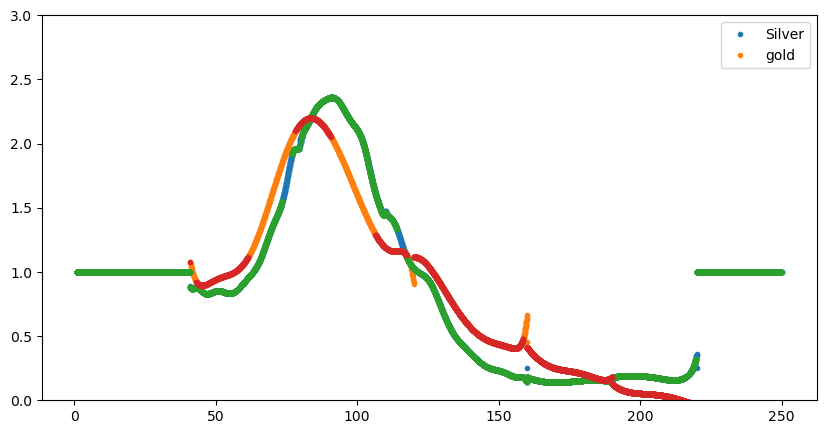

In [ ]:
figure(figsize=(10, 5),dpi=100)
plt.plot(nm_Ag22,norm_factor_Ag,'.',label='Silver')
plt.plot(nm_Au22,norm_factor_Au,'.',label='gold')

[new_nm_Ag,new_f_Ag] = remove_spikes(nm_list=nm_Ag22,f_list=norm_factor_Ag,delta=0.003)
[new_nm_Au,new_f_Au] = remove_spikes(nm_list=nm_Au22,f_list=norm_factor_Au,delta=0.003)
plt.plot(new_nm_Ag,new_f_Ag,'.')
plt.plot(new_nm_Au,new_f_Au,'.')
plt.ylim(0,3)

plt.legend()

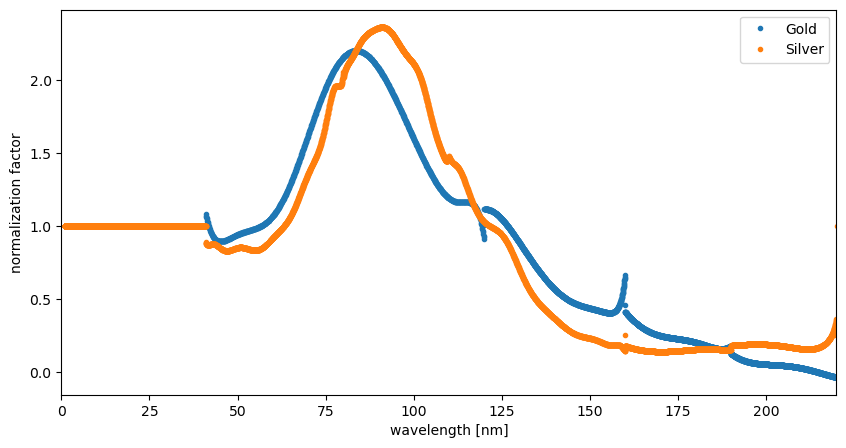

In [ ]:
figure(figsize=(10, 5),dpi=100)

plt.plot(nm_Au21,np.array(norm_factor_Au),'.',label='Gold')
plt.plot(nm_Ag22,np.array(norm_factor_Ag),'.',label='Silver')

f_lims =   [ 41 , 100 , 120, 160, 190 ,220]
f_orders = [   15,  4,   4,   5,    4]

f_fits = split_to_fit(eV_list=convert_nm_to_eV(nm_Ag22),TEY_list=norm_factor_Ag,nm_limits=f_lims,orders=f_orders)
f_regs = []
for i in range(len(f_lims)-1):
    f_reg = np.linspace(f_lims[i],f_lims[i+1],1000)
    f_regs.append(f_reg)
#for i in range(len(f_regs)):
#    nm = f_regs[i]
#    f_fit = f_fits[i]
#    factor = f_fit(nm)
#    if i ==1:
#        plt.plot(nm,factor,color='black',label='F polyfit (Silver)')
#    else:
#        plt.plot(nm,factor,color='black')

plt.xlabel('wavelength [nm]')
plt.ylabel('normalization factor')
plt.xlim(0,220)

plt.legend()
plt.savefig('plots/normalization_functions.png', dpi=300)

In [ ]:
import math
def remove_spikes_log(nm_list=list,f_list=list,delta=float):
    new_nm=[nm_list[0]]
    new_f=[f_list[0]]
    for i in range(len(nm_list)-1):
        if abs(math.log10(abs(f_list[i+1]))-math.log10(abs(f_list[i]))) <= delta:
            new_f.append(f_list[i+1])
            new_nm.append(nm_list[i])
    return [new_nm,new_f]

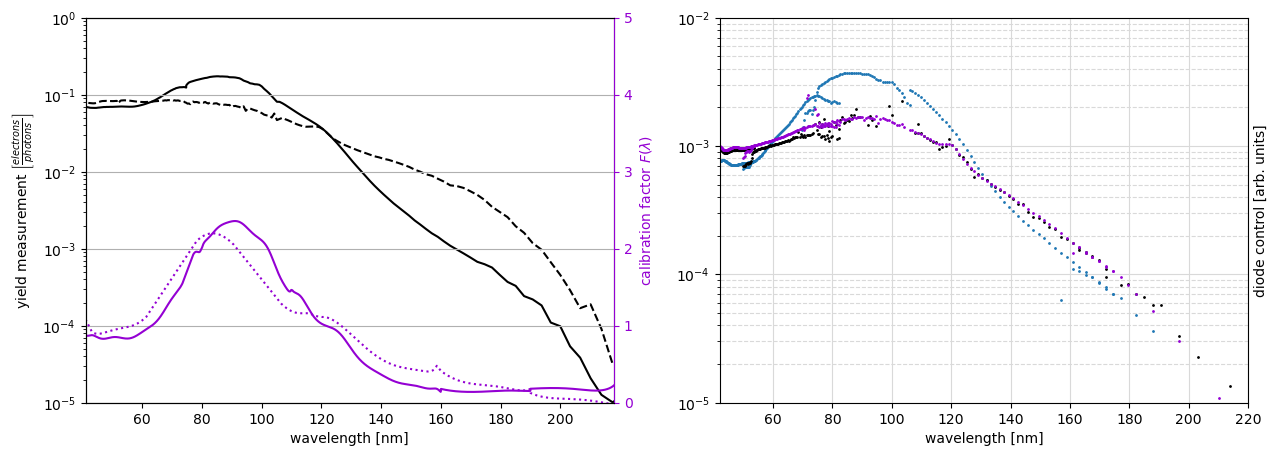

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

ax[0].plot(convert_eV_to_nm(Ag_45_E),Ag_45_TEY,'-',label='Ag 2021',color='black')
ax[0].plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY,'--',label='Ag 2022',color='black')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-5,1)
ax[0].set_xlim(41,218)
ax[0].set_xlabel('wavelength [nm]')
ax[0].set_ylabel(r"yield measurement $\left[\frac{electrons}{photons}\right]$",color='black')

#leg = ax[0].legend(loc="upper left")
#for lh in leg.legendHandles:
#    lh._legmarker.set_alpha(1)
#    lh._legmarker.set_markersize(20)

ax0=ax[0].twinx()

ax0.plot(new_nm_Ag,np.array(new_f_Ag),'-',label='via Ag',color='darkviolet')
ax0.plot(new_nm_Au,np.array(new_f_Au),linestyle='dotted',label='via Au',color='darkviolet')
ax0.set_ylim(0,5)
ax0.set_ylabel(r"calibration factor $F(\lambda)$",color='darkviolet')
ax0.spines['right'].set_color('darkviolet')
ax0.tick_params(axis='y', colors='darkviolet')

#leg = ax0.legend(loc="upper right")
#for lh in leg.legendHandles:
#    lh._legmarker.set_alpha(1)
#    lh._legmarker.set_markersize(20)

plt.grid()

[E_aug21, value_aug21, empty] = read_text_file('other_txt_files/aug21_photodiode_test.txt')
[E_march22, value_march22, empty] = read_text_file('other_txt_files/march22_photodiode_test.txt')
[E_aug22, value_aug22, empty] = read_text_file('other_txt_files/aug22_photodiode_test.txt')

[E_aug21,val_aug21] = remove_spikes_log(nm_list=E_aug21,f_list=value_aug21,delta=0.07)
[E_march22,val_march22] = remove_spikes_log(nm_list=E_march22,f_list=value_march22,delta=0.08)
[E_aug22,val_aug22] = remove_spikes_log(nm_list=E_aug22,f_list=value_aug22,delta=0.07)

ax[1].plot(E_aug21,val_aug21,'.',markersize=2,label='August 2021 (SXUV diode)',color='tab:blue')
ax[1].plot(E_march22,val_march22,'.',markersize=2,label='March  2022 (AXUV diode)',color='black')
ax[1].plot(E_aug22,val_aug22,'.',markersize=2,label='August 2022 (AXUV diode)',color='darkviolet')
ax[1].set_yscale('log')
ax[1].set_xlim(42,220)
ax[1].set_ylim(1e-5,1e-2)
ax[1].grid(which = 'major', linestyle='-',color='0.85')
ax[1].grid(which = 'minor', linestyle='--', color='0.85')
ax[1].set_xlabel('wavelength [nm]')
ax[1].set_ylabel('diode control [arb. units]')
ax[1].yaxis.set_label_position("right")
#ax[1].yaxis.tick_right()

#leg = ax[1].legend(loc="upper right")
#for lh in leg.legendHandles:
#    lh._legmarker.set_alpha(1)
#    lh._legmarker.set_markersize(20)

plt.savefig('plots/yield_Ag_comparison.png', bbox_inches='tight', dpi=300)

In [ ]:
def normalize_tey(nm_list=list,tey_list=list,err_list=list,f_regs=list,f_fits=list):
    normalized_tey = [] #start an empty list
    new_err = [] #this will be the new absolute error
    for i in range(len(nm_list)): #for all wavelengths
        nm = nm_list[i]
        found_flag = False #was the wavelength found yet?
        for j in range(len(f_regs)): #for each polyfit region
            if nm >= f_regs[j][0] and nm < f_regs[j][-1]: #if the wavelength value is within the investigated region
                f_fit = f_fits[j] #note which polyfit to use
                found_flag = True 
        if found_flag == True:        
            factor = f_fit(nm) *1.1
        else:
            factor = 1
        normalized_tey.append(tey_list[i]*factor)
    for i in range(len(nm_list)):
        new_err.append(err_list[i]/tey_list[i]*normalized_tey[i]) #keep relative error value intact, adjust absolute value accordingly
        
    return [nm_list, normalized_tey, new_err]

Text(0, 0.5, 'photoelectric yield $\\left[\\frac{electrons}{photons}\\right]$')

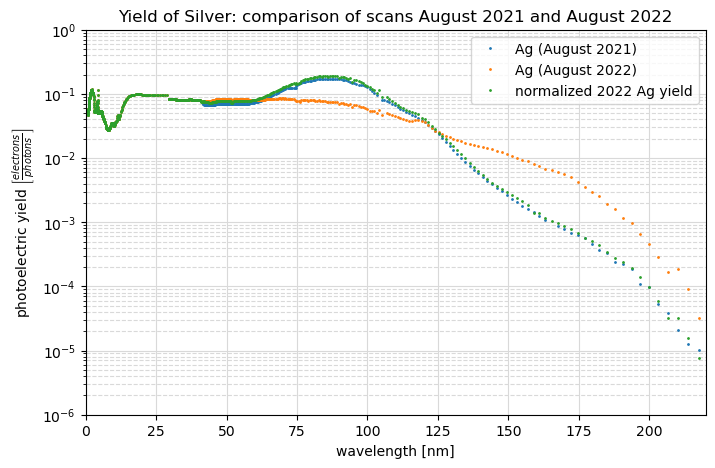

In [ ]:
figure(figsize=(8, 5),dpi=100)
plt.plot(convert_eV_to_nm(Ag_45_E),Ag_45_TEY,'.',markersize=2,label='Ag (August 2021)')
plt.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY,'.',markersize=2,label='Ag (August 2022)')

[Ag_aug22_nm, Ag_TEY_aug22_NORM, Ag_aug22_TEY_err_NORM] = normalize_tey(nm_list=convert_eV_to_nm(Ag_full_E),tey_list=Ag_full_TEY,err_list=Ag_full_TEY_err,f_regs=f_regs,f_fits=f_fits)

plt.plot(Ag_aug22_nm,Ag_TEY_aug22_NORM,'.',markersize=2,label='normalized 2022 Ag yield')

plt.grid(which = 'major', linestyle='-',color='0.85')
plt.grid(which = 'minor', linestyle='--', color='0.85')
plt.yscale('log')
plt.xlim(0,220)
plt.ylim(1e-6,1)
plt.legend()
plt.title('Yield of Silver: comparison of scans August 2021 and August 2022')
plt.xlabel('wavelength [nm]')
plt.ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$")

#leg = plt.legend(loc="upper right")
#for lh in leg.legendHandles:
#    lh._legmarker.set_alpha(1)
#    lh._legmarker.set_markersize(20)

# Now actually normalizing stuff:

In [ ]:
[Ag_full_nm, Ag_full_TEY_NORM, Ag_full_TEY_err_NORM] = normalize_tey(nm_list=convert_eV_to_nm(Ag_full_E),tey_list=Ag_full_TEY,err_list=Ag_full_TEY_err,f_regs=f_regs,f_fits=f_fits)
[Coverglass_full_nm, Coverglass_full_TEY_NORM, Coverglass_full_TEY_err_NORM] = normalize_tey(nm_list=convert_eV_to_nm(Coverglass_full_E),tey_list=Coverglass_full_TEY,err_list=Coverglass_full_TEY_err,f_regs=f_regs,f_fits=f_fits)
[Ti_full_nm, Ti_full_TEY_NORM, Ti_full_TEY_err_NORM] = normalize_tey(nm_list=convert_eV_to_nm(Ti_full_E),tey_list=Ti_full_TEY,err_list=Ti_full_TEY_err,f_regs=f_regs,f_fits=f_fits)
[ITO_MLI_aug22_full_nm, ITO_MLI_aug22_full_TEY_NORM, ITO_MLI_aug22_full_TEY_err_NORM] = normalize_tey(nm_list=convert_eV_to_nm(ITO_MLI_aug22_full_E),tey_list=ITO_MLI_aug22_full_TEY,err_list=ITO_MLI_aug22_full_TEY_err,f_regs=f_regs,f_fits=f_fits)

In [ ]:
lines = ['photon_energy_eV    total_yield    yield_error'] #data will be written into a file in this format
for i in range(len(Ag_full_nm)):
    line = str(convert_nm_to_eV(Ag_full_nm)[i]) + ' ' + str(abs(Ag_full_TEY_NORM[i])) + ' ' + str(Ag_full_TEY_err_NORM[i])
    lines.append(line)
with open('TEY_files/Ag_full_yield_NORM.txt', 'w') as f:
    f.write('\n'.join(lines))

In [ ]:
lines = ['photon_energy_eV    total_yield    yield_error'] #data will be written into a file in this format
for i in range(len(Coverglass_full_nm)):
    line = str(convert_nm_to_eV(Coverglass_full_nm)[i]) + ' ' + str(abs(Coverglass_full_TEY_NORM[i])) + ' ' + str(Coverglass_full_TEY_err_NORM[i])
    lines.append(line)
with open('TEY_files/Coverglass_full_yield_NORM.txt', 'w') as f:
    f.write('\n'.join(lines))

In [ ]:
lines = ['photon_energy_eV    total_yield    yield_error'] #data will be written into a file in this format
for i in range(len(Ti_full_nm)):
    line = str(convert_nm_to_eV(Ti_full_nm)[i]) + ' ' + str(abs(Ti_full_TEY_NORM[i])) + ' ' + str(Ti_full_TEY_err_NORM[i])
    lines.append(line)
with open('TEY_files/Ti_full_yield_NORM.txt', 'w') as f:
    f.write('\n'.join(lines))

In [ ]:
lines = ['photon_energy_eV    total_yield    yield_error'] #data will be written into a file in this format
for i in range(len(ITO_MLI_aug22_full_nm)):
    line = str(convert_nm_to_eV(ITO_MLI_aug22_full_nm)[i]) + ' ' + str(abs(ITO_MLI_aug22_full_TEY_NORM[i])) + ' ' + str(ITO_MLI_aug22_full_TEY_err_NORM[i])
    lines.append(line)
with open('TEY_files/ITO_MLI_aug22_full_yield_NORM.txt', 'w') as f:
    f.write('\n'.join(lines))

# Normalized Silver:

        Current density [A/m^2]: 5.488092771136817e-05
rounded Current density [A/m^2]: 5.49e-05
        error [A/m^2]:           1.6016273882809204e-05
relative error:                  0.29


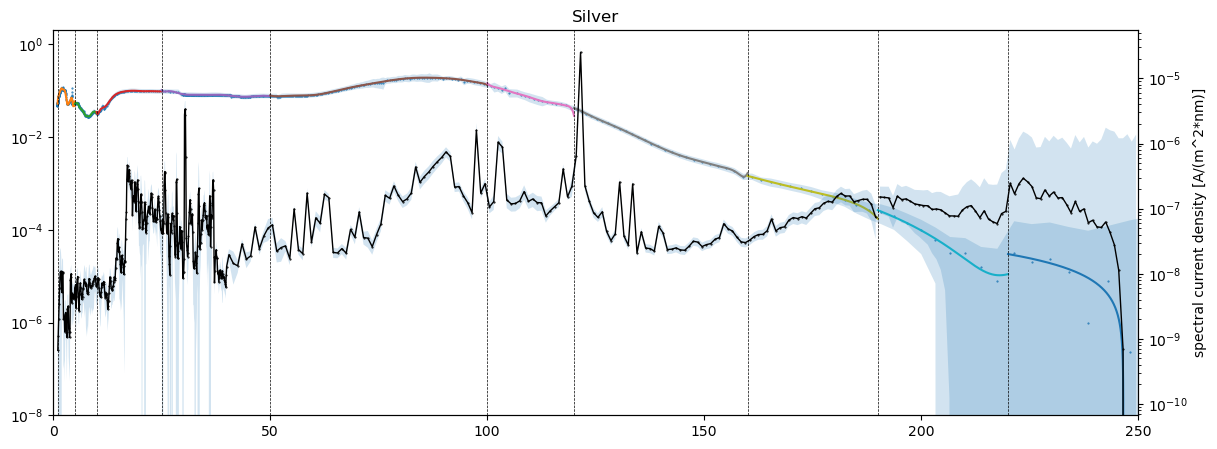

In [ ]:
import warnings
warnings.filterwarnings('ignore')

name = 'Silver'
eV_list = Ag_full_E
TEY_list = Ag_full_TEY_NORM
TEY_err_list = Ag_full_TEY_err_NORM
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)
ax1.set_ylim(1e-8,2)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

# Normalized Titanium:

        Current density [A/m^2]: 5.1133480321547706e-05
rounded Current density [A/m^2]: 5.11e-05
        error [A/m^2]:           1.2418308989585265e-05
relative error:                  0.24


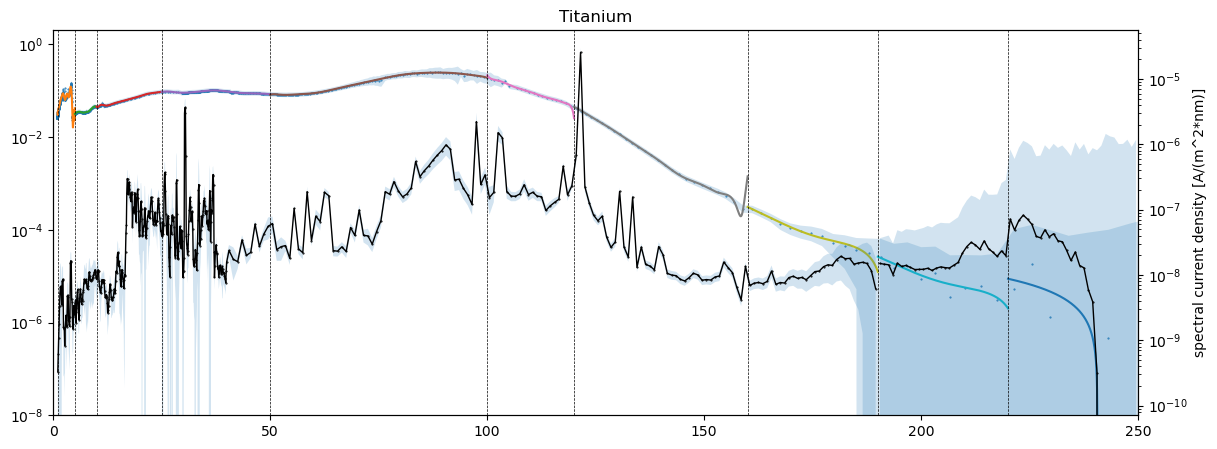

In [ ]:
import warnings
warnings.filterwarnings('ignore')

name = 'Titanium'
eV_list = Ti_full_E
TEY_list = Ti_full_TEY_NORM
TEY_err_list = Ti_full_TEY_err_NORM
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 250]
orders = [ 15, 15,  15,  15,   15,  15,   15, 3, 3, 1  ]


fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)
ax1.set_ylim(1e-8,2)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]*d_nm
        else:
            int_flux_err += flux_err[i]*d_nm

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

# Normalized ITO MLI:

        Current density [A/m^2]: 4.670707523724445e-05
rounded Current density [A/m^2]: 4.67e-05
        error [A/m^2]:           2.995373759426317e-05
relative error:                  0.64


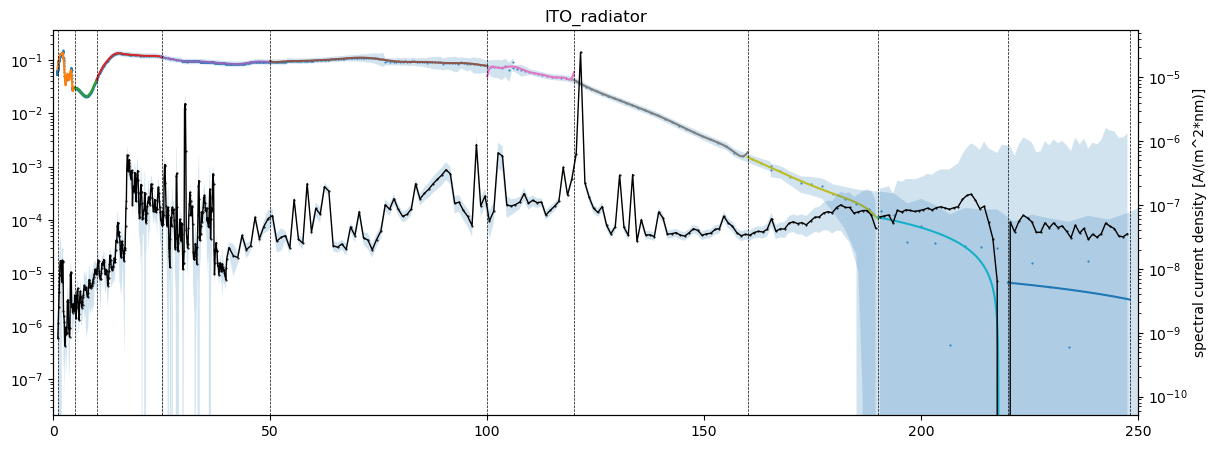

In [ ]:
import warnings
warnings.filterwarnings('ignore')

name = 'ITO_radiator'
eV_list = convert_nm_to_eV(ITO_MLI_aug22_full_nm)
TEY_list = ITO_MLI_aug22_full_TEY
TEY_err_list = ITO_MLI_aug22_full_TEY_err
lims =   [1 , 5 , 10 , 25 , 50 , 100 , 120, 160, 190 ,220, 248]
orders = [ 15, 15,  15,  15,   15,  15,   10, 3, 1, 1  ]

fig, ax1 = plt.subplots(figsize=(14, 5), dpi=100)
ax2 = ax1.twinx()
ax1.plot(convert_eV_to_nm(eV_list),TEY_list,'.',markersize=1,label=name)
ax1.fill_between(np.array(convert_eV_to_nm(eV_list)), np.array(TEY_list)+np.array(TEY_err_list), np.array(TEY_list)-np.array(TEY_err_list), alpha=alpha, joinstyle=joinstyle)
ax1.set_yscale('log')
ax1.set_xlim(0,250)

fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_list,nm_limits=lims,orders=orders)
err_fits = split_to_fit(eV_list=eV_list,TEY_list=TEY_err_list,nm_limits=lims,orders=orders)

regs = []
for i in range(len(lims)-1):
    reg = np.linspace(lims[i],lims[i+1],1000)
    regs.append(reg)

for i in range(len(regs)):
    nm = regs[i]
    fit = fits[i]
    tey = fit(nm)
    ax1.plot(nm,tey)
for val in lims:
    plt.axvline(x=val,linestyle='--',linewidth=0.5,color='black')

e = 1.602e-19
[nm,flux,flux_err] = el_flux(wavelength,irradiance,irr_stdev,lims,fits,err_fits)
ax2.plot(nm,flux*e,'.',color='black',linestyle='-',markersize=1,linewidth=1)
ax2.fill_between(nm,flux*e+flux_err*e, flux*e-flux_err*e, alpha=alpha, joinstyle=joinstyle)
ax2.set_ylabel('spectral current density [A/(m^2*nm)]')

ax2.set_yscale('log')
plt.title(name)

int_flux = 0 
int_flux_err = 0
for i in range(len(nm)-1):
    d_nm = nm[i+1]-nm[i]
    if flux[i] > 0:
        int_flux += flux[i]*d_nm
    if flux_err[i] > 0:
        if (flux[i]-flux_err[i]) < 0:
            int_flux_err += flux[i]
        else:
            int_flux_err += flux_err[i]

J = int_flux*e
J_err = int_flux_err*e
ord = round(np.log10(J_err))
rel_err = round(J_err/J,2)
J_rounded = round(J, int(-1*ord+2))
print('        Current density [A/m^2]:',J)
print('rounded Current density [A/m^2]:', J_rounded)
print('        error [A/m^2]:          ',J_err)
print('relative error:                 ',rel_err)

lines = ['wavelength(nm)    spectral_current_density(A*m^-2*nm^-1)    error(A*m^-2*nm^-1)'] #data will be written into a file in this format
for l in range(len(nm)):
    line = str(nm[l]) + ' ' + str(flux[l]*e) + ' ' + str(flux_err[l]*e)
    lines.append(line)

with open('spectral_current_files/' + str(name) + '_spectral_current_density.txt', 'w') as f:
    f.write('\n'.join(lines))

AttributeError: 'Line2D' object has no attribute '_legmarker'

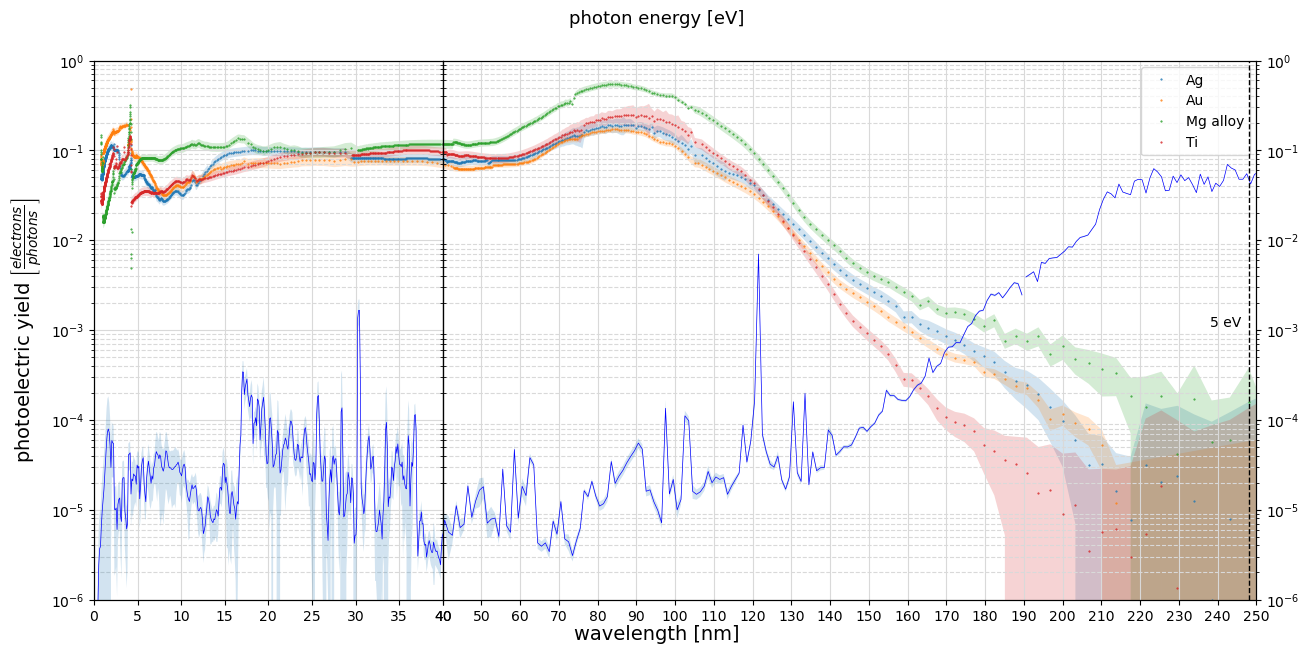

In [ ]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (15,7),dpi=100)
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY_NORM,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Ag_full_E)), np.array(Ag_full_TEY_NORM)+np.array(Ag_full_TEY_err_NORM), np.array(Ag_full_TEY_NORM)-np.array(Ag_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Ag_full_E),Ag_full_TEY_NORM,'.',markersize=1,label='Ag')
ax2.fill_between(np.array(convert_eV_to_nm(Ag_full_E)), np.array(Ag_full_TEY_NORM)+np.array(Ag_full_TEY_err_NORM), np.array(Ag_full_TEY_NORM)-np.array(Ag_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Au_full_E),Au_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Au_full_E)), np.array(Au_full_TEY)+np.array(Au_full_TEY_err), np.array(Au_full_TEY)-np.array(Au_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Au_full_E),Au_full_TEY,'.',markersize=1,label='Au')
ax2.fill_between(np.array(convert_eV_to_nm(Au_full_E)), np.array(Au_full_TEY)+np.array(Au_full_TEY_err), np.array(Au_full_TEY)-np.array(Au_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Mg_alloy_full_E),Mg_alloy_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Mg_alloy_full_E)), np.array(Mg_alloy_full_TEY)+np.array(Mg_alloy_full_TEY_err), np.array(Mg_alloy_full_TEY)-np.array(Mg_alloy_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Mg_alloy_full_E),Mg_alloy_full_TEY,'.',markersize=1,label='Mg alloy')
ax2.fill_between(np.array(convert_eV_to_nm(Mg_alloy_full_E)), np.array(Mg_alloy_full_TEY)+np.array(Mg_alloy_full_TEY_err), np.array(Mg_alloy_full_TEY)-np.array(Mg_alloy_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Ti_full_E),Ti_full_TEY_NORM,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Ti_full_E)), np.array(Ti_full_TEY_NORM)+np.array(Ti_full_TEY_err_NORM), np.array(Ti_full_TEY_NORM)-np.array(Ti_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Ti_full_E),Ti_full_TEY_NORM,'.',markersize=1,label='Ti')
ax2.fill_between(np.array(convert_eV_to_nm(Ti_full_E)), np.array(Ti_full_TEY_NORM)+np.array(Ti_full_TEY_err_NORM), np.array(Ti_full_TEY_NORM)-np.array(Ti_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)

plt.axvline(x=convert_eV_to_nm([5])[0],linestyle='--',color='black',linewidth=1)
plt.text(x=238.0,y=1.1e-3,s='5 eV')

x_stop = 250
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

plt.figtext(0.5, 0.06, 'wavelength [nm]', ha='center', va='center',size=14)
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

leg = ax2.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

ax6 = ax2.twiny()
new_eV_ticks=[5,6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax4.set_ylabel(r"solar spectral irradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/metals_yield_stretched_normalized.png', bbox_inches='tight', dpi=300)

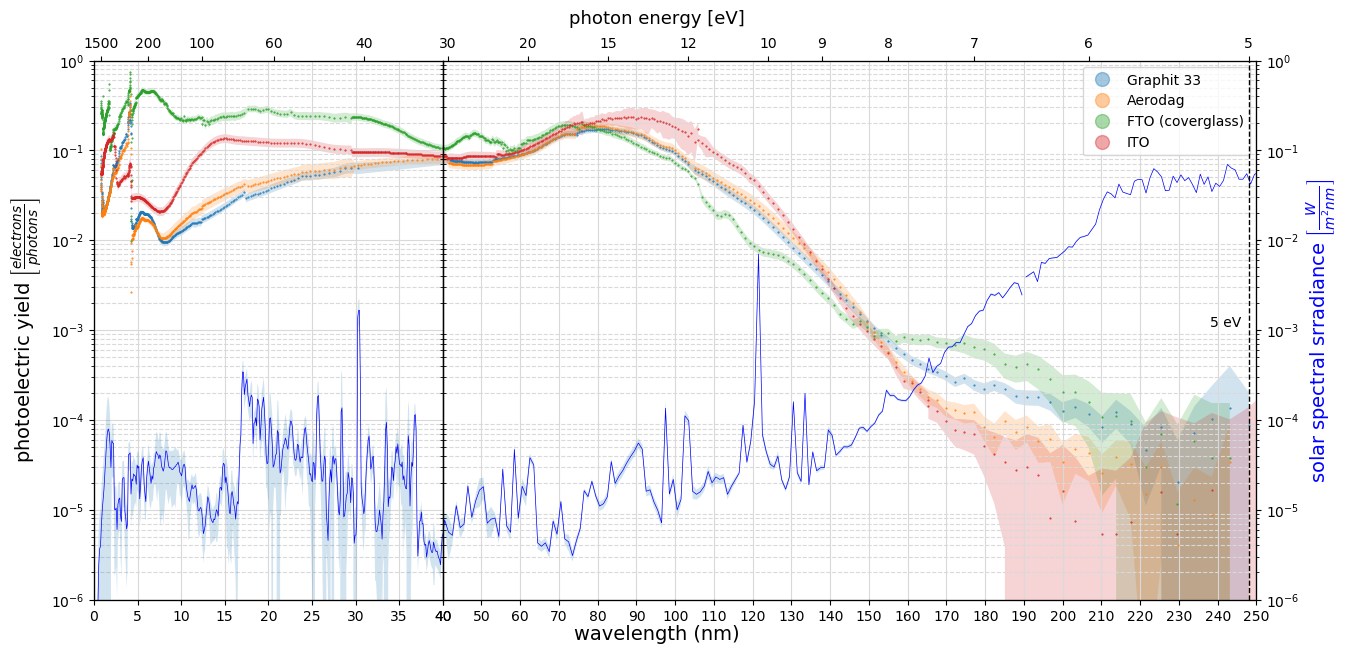

In [ ]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (15,7),dpi=100)
gs = gridspec.GridSpec(1, 10)
gs.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

marker='.'
markersize=1
linewidth = 0.5
linestyle='none'
alpha=0.2
joinstyle='round'

ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])

ax3 = ax1.twinx()
ax3.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax3.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax4 = ax2.twinx()
ax4.plot(wavelength,irradiance,color='blue',linewidth=0.5,label='Solar\nIrradiance')
ax4.fill_between(wavelength, irradiance+irr_stdev, irradiance-irr_stdev, alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Graphite_full_E),Graphite_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Graphite_full_E)), np.array(Graphite_full_TEY)+np.array(Graphite_full_TEY_err), np.array(Graphite_full_TEY)-np.array(Graphite_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Graphite_full_E),Graphite_full_TEY,'.',markersize=1,label='Graphit 33')
ax2.fill_between(np.array(convert_eV_to_nm(Graphite_full_E)), np.array(Graphite_full_TEY)+np.array(Graphite_full_TEY_err), np.array(Graphite_full_TEY)-np.array(Graphite_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Aerodag_full_E),Aerodag_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Aerodag_full_E)), np.array(Aerodag_full_TEY)+np.array(Aerodag_full_TEY_err), np.array(Aerodag_full_TEY)-np.array(Aerodag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Aerodag_full_E),Aerodag_full_TEY,'.',markersize=1,label='Aerodag')
ax2.fill_between(np.array(convert_eV_to_nm(Aerodag_full_E)), np.array(Aerodag_full_TEY)+np.array(Aerodag_full_TEY_err), np.array(Aerodag_full_TEY)-np.array(Aerodag_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(Coverglass_full_E),Coverglass_full_TEY,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(Coverglass_full_E)), np.array(Coverglass_full_TEY)+np.array(Coverglass_full_TEY_err), np.array(Coverglass_full_TEY)-np.array(Coverglass_full_TEY_err), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(Coverglass_full_E),Coverglass_full_TEY,'.',markersize=1,label='FTO (coverglass)')
ax2.fill_between(np.array(convert_eV_to_nm(Coverglass_full_E)), np.array(Coverglass_full_TEY)+np.array(Coverglass_full_TEY_err), np.array(Coverglass_full_TEY)-np.array(Coverglass_full_TEY_err), alpha=alpha, joinstyle=joinstyle)

ax1.plot(convert_eV_to_nm(ITO_MLI_aug22_full_E),ITO_MLI_aug22_full_TEY_NORM,'.',markersize=1)
ax1.fill_between(np.array(convert_eV_to_nm(ITO_MLI_aug22_full_E)), np.array(ITO_MLI_aug22_full_TEY_NORM)+np.array(ITO_MLI_aug22_full_TEY_err_NORM), np.array(ITO_MLI_aug22_full_TEY_NORM)-np.array(ITO_MLI_aug22_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)
ax2.plot(convert_eV_to_nm(ITO_MLI_aug22_full_E),ITO_MLI_aug22_full_TEY_NORM,'.',markersize=1,label='ITO')
ax2.fill_between(np.array(convert_eV_to_nm(ITO_MLI_aug22_full_E)), np.array(ITO_MLI_aug22_full_TEY_NORM)+np.array(ITO_MLI_aug22_full_TEY_err_NORM), np.array(ITO_MLI_aug22_full_TEY_NORM)-np.array(ITO_MLI_aug22_full_TEY_err_NORM), alpha=alpha, joinstyle=joinstyle)

plt.axvline(x=convert_eV_to_nm([5])[0],linestyle='--',color='black',linewidth=1)
plt.text(x=238.0,y=1.1e-3,s='5 eV')

x_stop = 250
ax1.set_xlim(0,40)
ax2.set_xlim(40,x_stop)

ax1.set_ylim([1e-6,1])
ax2.set_ylim([1e-6,1])
ax3.set_ylim([1e-6,1])
ax4.set_ylim([1e-6,1])
ax1.set_yscale("log")
ax2.set_yscale("log")
ax3.set_yscale('log')
ax4.set_yscale('log')

#plt.figtext(0.5, 0.9, 'Photoelectric Yield of Graphite Coatings and Coverglass with Solar Spectral Irradiance Superimposed', ha='center', va='center',fontsize='medium')
plt.figtext(0.5, 0.06, 'wavelength (nm)', ha='center', va='center',size=14)
plt.figtext(0.5, 0.94, 'photon energy [eV]', ha='center', va='center',size=13)
ax1.set_ylabel(r"photoelectric yield $\left[\frac{electrons}{photons}\right]$",size=14)
ax1.grid(which = 'major', linestyle='-',color='0.85')
ax1.grid(which = 'minor', linestyle='--', color='0.85')

ax2.grid(which = 'major', linestyle='-',color='0.85')
ax2.grid(which = 'minor', linestyle='--', color='0.85')
ax2.set_xticks(np.arange(40,x_stop+1,10))
ax2.set_yscale('log')

ax2.set_yticks([])
ax3.set_yticks([])

leg = ax2.legend(loc="upper right")
for lh in leg.legendHandles:
    lh._legmarker.set_alpha(0.4)
    lh._legmarker.set_markersize(20)

ax6 = ax2.twiny()
new_eV_ticks=[5,6,7,8,9,10,12,15,20,30]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax6.set_xlim(ax2.get_xlim())
ax6.set_xticks(new_tick_locations)
ax6.set_xticklabels(new_eV_ticks)

ax5 = ax1.twiny()
new_eV_ticks=[40,60,100,200,1500]
new_tick_locations = np.array(convert_eV_to_nm(new_eV_ticks))
ax5.set_xlim(ax1.get_xlim())
ax5.set_xticks(new_tick_locations)
ax5.set_xticklabels(new_eV_ticks)

ax4.set_ylabel(r"solar spectral srradiance $\left[\frac{W}{m^2 nm}\right]$",color='blue',size=14)

plt.savefig('plots/graphite_coverglass_yield_stretched_normalized.png', bbox_inches='tight', dpi=300)